In [1]:
from rbibm.utils.utils_data import query

from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_model_by_id, get_adversarial_examples_by_id
from rbibm.plots.multi_plots import multi_plot, get_sorting_key_fn
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

In [2]:
import torch
torch.manual_seed(0)

In [3]:
name = "benchmark"
df = query(name)

In [4]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

color_map_defenses = {"None": "#0868ac", "FIM regularizer": "#8856a7", "Adv. training": "#df65b0", "Trades": "#2ca25f"}
defense = ["None","FIMTraceRegularizer", "L2PGDrKLTrades", "L2PGDTargetedAdversarialTraining"]

{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': 'gaussian_linear', 'N_train': [1000, 10000, 100000], 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': 'lotka_volterra', 'N_train': [1000, 10000, 100000], 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': 'vae_task', 'N_train': [1000, 10000, 100000], 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': 'hudgkin_huxley', 'N_train': [1000, 10000, 100000], 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrK

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


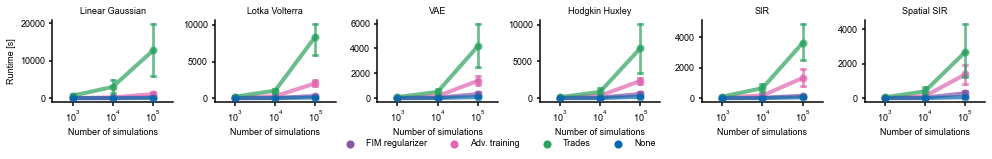

In [5]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "loss", plot_by_num_simulations,y="train_time", hue="defense", defense=defense, alpha=0.7, color_map=color_map_defenses,task=["gaussian_linear", "sir", "lotka_volterra", "spatial_sir", "hudgkin_huxley", "vae_task"], N_train=[1000,10000,100000])
    axes[0,0].set_ylabel("Runtime [s]")
    fig.savefig("runtime_per_task.svg")
    plt.show()

{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': ['gaussian_linear', 'sir', 'lotka_volterra', 'spatial_sir', 'hudgkin_huxley', 'vae_task'], 'N_train': [1000, 10000, 100000], 'model_name': 'gaussian', 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': ['gaussian_linear', 'sir', 'lotka_volterra', 'spatial_sir', 'hudgkin_huxley', 'vae_task'], 'N_train': [1000, 10000, 100000], 'model_name': 'multivariate_gaussian', 'loss': 'NLLLoss'}
{'y': 'train_time', 'hue': 'defense', 'defense': ['None', 'FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining'], 'alpha': 0.7, 'task': ['gaussian_linear', 'sir', 'lotka_volterra', 'spatial_sir', 'hudgkin_huxley', 'vae_task'], 'N_train': [1000, 10000, 100000], 'model_name': 'mixture_gaussian', 'loss': 'NLLLo

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


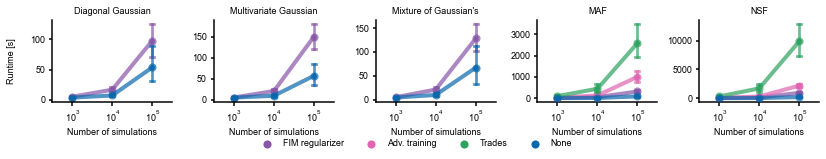

In [6]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "model_name", "loss", plot_by_num_simulations,y="train_time", hue="defense", defense=defense, alpha=0.7, color_map=color_map_defenses,task=["gaussian_linear", "sir", "lotka_volterra", "spatial_sir", "hudgkin_huxley", "vae_task"], N_train=[1000,10000,100000])
    axes[0,0].set_ylabel("Runtime [s]")
    fig.savefig("runtime_per_model.svg")
    plt.show()

In [7]:
df = query_main(name, model_name="maf", N_train=100000)

In [8]:
df.groupby("defense").mean()["train_time"].round()

defense
FIMTraceRegularizer                  316.0
L2PGDTargetedAdversarialTraining    1005.0
L2PGDrKLTrades                      2594.0
None                                  85.0
Name: train_time, dtype: float64